# Data Science from Scratch

Author of the book: Joel Grus

## Python's dictionaries to represent graphs

In [1]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

In [2]:
friendships_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4,5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [3]:
friendships = {user["id"]: [] for user in users}
print(friendships)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


In [4]:
for id1_, id2_ in friendships_pairs:
    friendships[id2_].append(id1_)
    friendships[id1_].append(id2_)
print(friendships)

{0: [1, 2], 1: [0, 2, 3], 2: [0, 1, 3], 3: [1, 2, 4], 4: [3, 5], 5: [4, 6, 7], 6: [5, 8], 7: [5, 8], 8: [6, 7, 9], 9: [8]}


In [5]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friends_ids = friendships[user_id]
    return len(friends_ids)

total_connections = sum(number_of_friends(user) for user in users)
print(total_connections)

24


In [6]:
avg_connection_per_user = total_connections/len(users)
print(avg_connection_per_user)

2.4


In [7]:
num_friends_by_id = [(user["name"], number_of_friends(user)) for user in users]
num_friends_by_id.sort(
    key=lambda kv: kv[1],
    reverse=True)
print(num_friends_by_id)

[('Dunn', 3), ('Sue', 3), ('Chi', 3), ('Clive', 3), ('Kate', 3), ('Hero', 2), ('Thor', 2), ('Hicks', 2), ('Devin', 2), ('Klein', 1)]


### Centrality

Now we can sort our users by their amount of connections. That way, we can say that a given user is *more central* than another in the network. This is known as computing the *degree centrality* of the network. Sorting by the amount of connections is a basic idea of centrality. A node could have fewer connections but still be a more "important" part of the network.

### Draw the graph

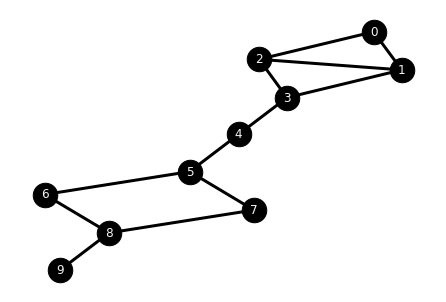

In [8]:
import networkx as nx

options = {
    'node_color': 'black',
    'node_size': 600,
    'width': 3,
    'with_labels': True,
    'font_color': "whitesmoke"
}

G = nx.Graph()

G.add_nodes_from(user["id"] for user in users)
G.add_edges_from(friendships_pairs)

nx.draw_kamada_kawai(G, **options)